<a href="https://colab.research.google.com/github/justinbkeeler/2023-NAA-Student/blob/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/Applied_Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#import data from github repo
url1 = "https://raw.githubusercontent.com/justinbkeeler/2023-NAA-Student/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/fruit.csv"
url2 = "https://raw.githubusercontent.com/justinbkeeler/2023-NAA-Student/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/fruit_ex.csv"

In [3]:
fruits = pd.read_csv(url2)

In [21]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,weight,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [24]:
X = fruits[['height', 'width', 'weight', 'color_score']]
y = fruits['fruit_label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

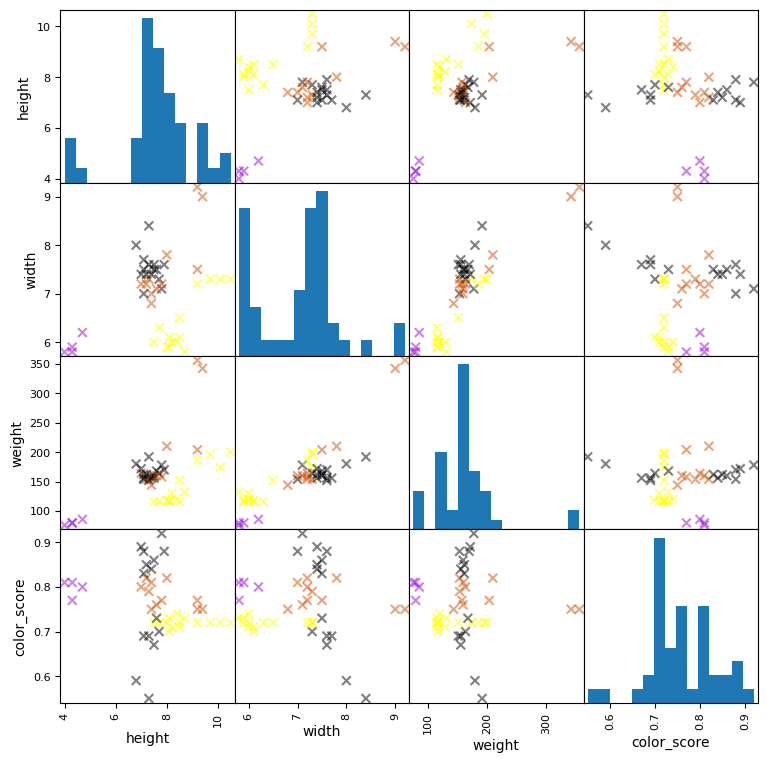

In [27]:
%matplotlib inline
import matplotlib
from matplotlib import cm
from pandas.plotting import scatter_matrix

cmap = matplotlib.colormaps['gnuplot']
cmap = matplotlib.colormaps.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c=y_train, marker='x', s=40, hist_kwds={'bins': 15}, figsize=(9, 9), cmap=cmap, edgecolor='black')
plt.show()

In [28]:
X = fruits[['weight', 'width', 'height']]
y = fruits['fruit_label']

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #default train/test is 75%/25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [31]:
knn.score(X_test,y_test)

0.5333333333333333

In [32]:
import logging
import warnings

# Configure logging to capture the warning message
logging.captureWarnings(True)
log_file = 'warning_log.txt'  # Specify the log file path

# Create a logger and set the log level to capture warnings
logger = logging.getLogger('sklearn_warnings')
logger.setLevel(logging.WARNING)

# Add a file handler to save the warning messages to the log file
handler = logging.FileHandler(log_file)
logger.addHandler(handler)

# Temporarily filter out the warning message
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Stop capturing warnings and remove the file handler
logging.captureWarnings(False)
logger.removeHandler(handler)


In [33]:
fruit_prediction = knn.predict([[25, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [34]:
fruit_prediction = knn.predict([[180, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'apple'

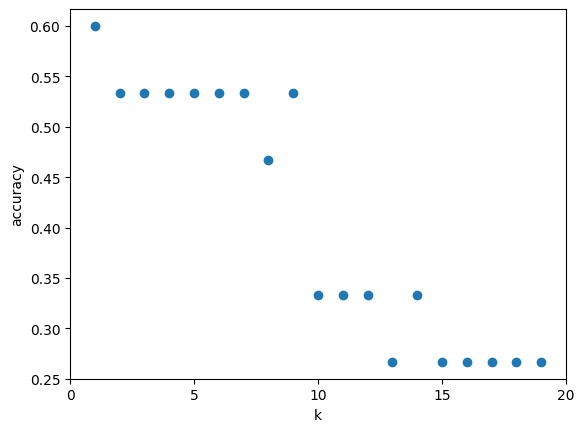

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])

plt.show()

###**Part 2**

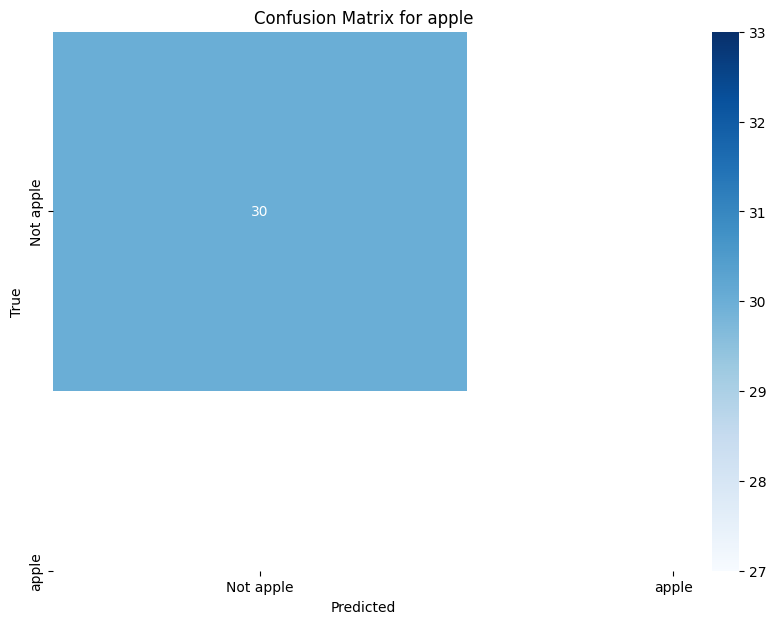

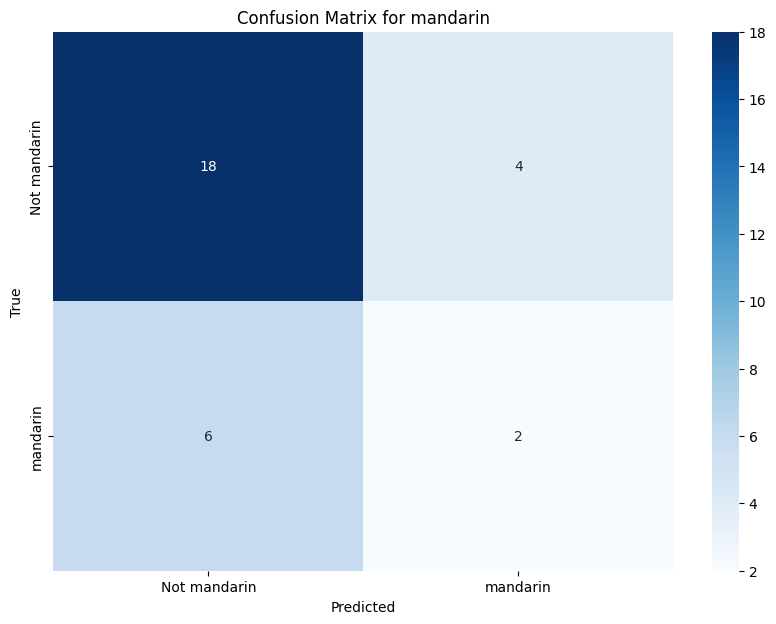

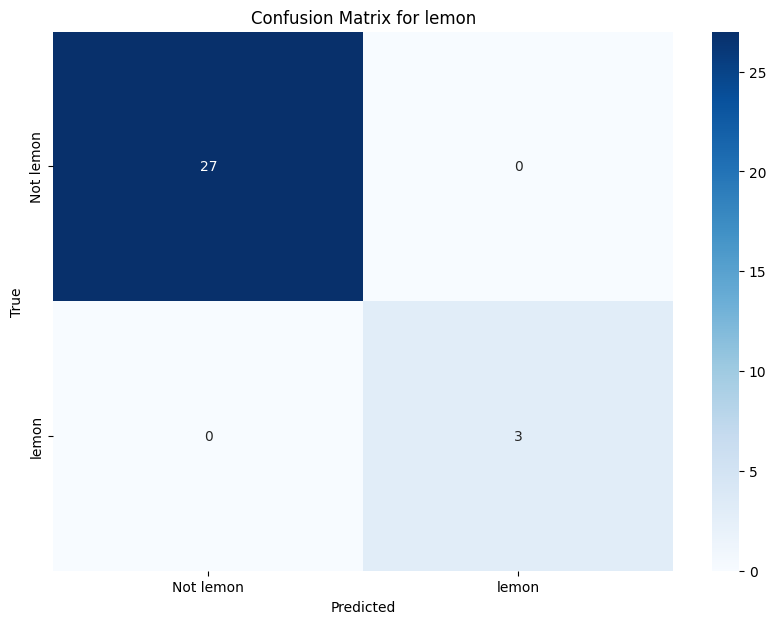

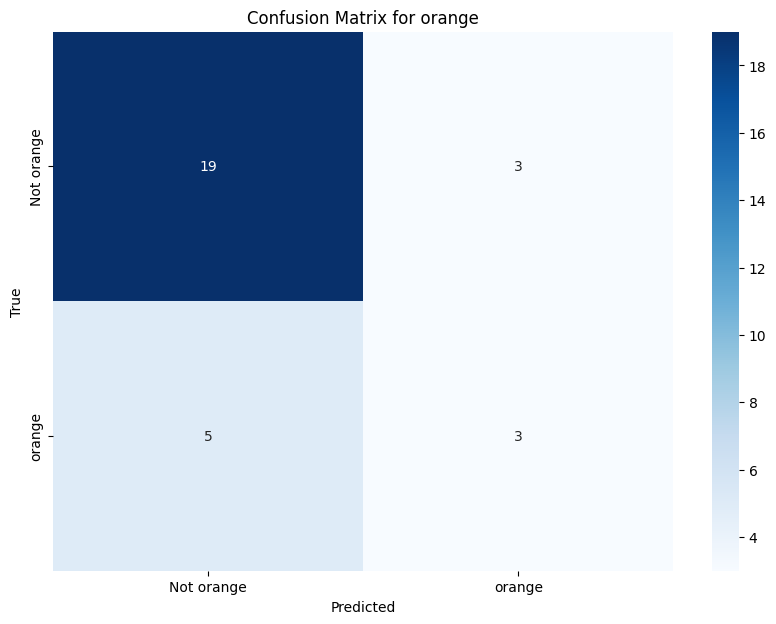

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])  # replace with your actual classes
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)  # adjust test_size as needed

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

# Use the KNN model to predict labels for the test set
y_score = knn.predict(X_test)

class_labels = ['apple', 'mandarin', 'lemon', 'orange']  # replace with your actual class labels

for i in range(n_classes):
    cm = confusion_matrix(y_test[:, i], y_score[:, i])

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Not {class_labels[i]}', class_labels[i]],
                yticklabels=[f'Not {class_labels[i]}', class_labels[i]])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {class_labels[i]}')
    plt.show()




## Accuracy

In [47]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(format(accuracy, '.3f'))



0.533


## Cross-Validation

In [43]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross validation

for score in cross_val_scores:
    print(format(score, '.3f'))

print("Average cross-validation score: {:.2f}".format(cross_val_scores.mean()))


0.500
0.583
0.500
0.667
0.545
Average cross-validation score: 0.56
